In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn import decomposition
os.chdir('/Users/Lenovo/Desktop/EBAC')

In [5]:
data = pd.read_excel('Amazon.xlsx')
data.head()

,Unnamed: 0,Velocidad Entrega,Precio,Durabilidad,Imagen Producto,Valor Educativo,Servicio Retorno,Tamano Paquete,Calidad Producto,Numero Estrellas
0,Adam,205,3,345,235,24,23,26,21,17
1,Anna,9,15,315,33,25,4,42,215,28
2,Bernard,17,26,285,3,43,27,41,26,33
3,Edward,135,5,355,295,18,23,39,195,17
4,Emilia,3,45,48,39,34,46,225,34,43


In [7]:
data.rename(columns={'Unnamed: 0': 'Comprador'}, inplace=True)
data

,Comprador,Velocidad Entrega,Precio,Durabilidad,Imagen Producto,Valor Educativo,Servicio Retorno,Tamano Paquete,Calidad Producto,Numero Estrellas
0,Adam,205,3,345,235,24,23,26,21,17
1,Anna,9,15,315,33,25,4,42,215,28
2,Bernard,17,26,285,3,43,27,41,26,33
3,Edward,135,5,355,295,18,23,39,195,17
4,Emilia,3,45,48,39,34,46,225,34,43
...,...,...,...,...,...,...,...,...,...,...
95,Teofan,3,8,32,25,7,21,42,17,1
96,Teofil,305,25,46,24,33,28,355,26,45
97,Teofila,1,14,26,25,24,27,42,185,23
98,Teon,155,11,335,34,26,29,42,215,27


In [11]:
# Normalizamos los datos
feature_cols = ['Velocidad Entrega', 'Precio', 'Durabilidad', 'Imagen Producto', 'Valor Educativo', 'Servicio Retorno', 'Tamano Paquete', 'Calidad Producto', 'Numero Estrellas']
new_data = data[feature_cols]
data_scaled = normalize(new_data)
data_scaled

array([[0.43826336, 0.00641361, 0.73756517, 0.50239946, 0.05130888,
        0.04917101, 0.05558462, 0.04489527, 0.03634379],
       [0.02323527, 0.03872544, 0.81323434, 0.08519598, 0.06454241,
        0.01032679, 0.10843125, 0.55506471, 0.0722875 ],
       [0.05723452, 0.08753514, 0.95951982, 0.01010021, 0.14476966,
        0.09090188, 0.13803618, 0.08753514, 0.11110229],
       [0.25885639, 0.00958727, 0.68069644, 0.56564916, 0.03451419,
        0.04410146, 0.07478074, 0.37390368, 0.03259673],
       [0.01197502, 0.17962533, 0.19160036, 0.15567529, 0.13571692,
        0.18361701, 0.89812667, 0.13571692, 0.17164198],
       [0.14494006, 0.251738  , 0.60264551, 0.03661644, 0.03966781,
        0.02898801, 0.73995715, 0.03356507, 0.00457705],
       [0.04755854, 0.02481315, 0.98218723, 0.06823617, 0.07237169,
        0.09304932, 0.07857498, 0.05996511, 0.06410064],
       [0.13323393, 0.04304481, 0.06354234, 0.52268696, 0.05739308,
        0.04509456, 0.70716471, 0.44069685, 0.05944283],


In [13]:
data_scaled = pd.DataFrame(data_scaled, columns = new_data.columns)
data_scaled.head()

,Velocidad Entrega,Precio,Durabilidad,Imagen Producto,Valor Educativo,Servicio Retorno,Tamano Paquete,Calidad Producto,Numero Estrellas
0,0.438263,0.006414,0.737565,0.502399,0.051309,0.049171,0.055585,0.044895,0.036344
1,0.023235,0.038725,0.813234,0.085196,0.064542,0.010327,0.108431,0.555065,0.072287
2,0.057235,0.087535,0.959520,0.010100,0.144770,0.090902,0.138036,0.087535,0.111102
3,0.258856,0.009587,0.680696,0.565649,0.034514,0.044101,0.074781,0.373904,0.032597
4,0.011975,0.179625,0.191600,0.155675,0.135717,0.183617,0.898127,0.135717,0.171642


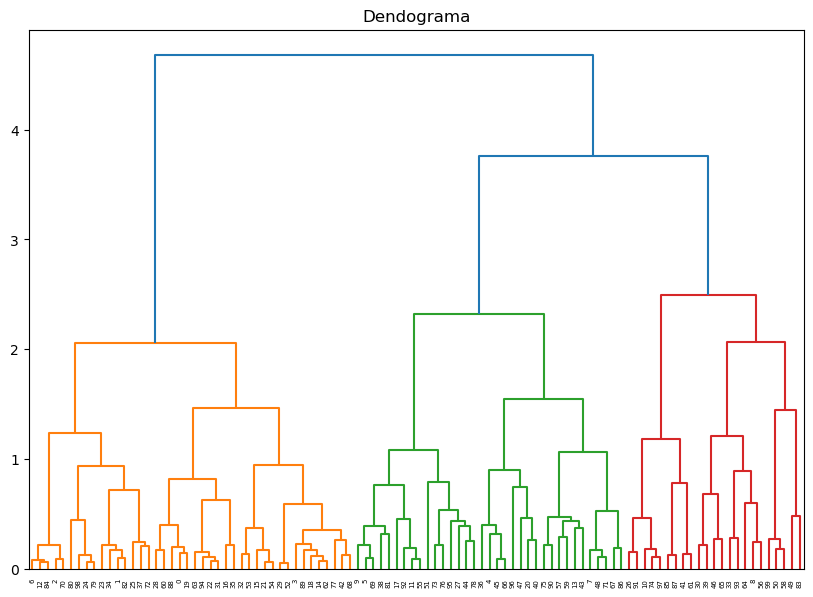

In [15]:
plt.figure(figsize = (10,7))
plt.title('Dendograma')
dend = shc.dendrogram(shc.linkage(data_scaled, method = 'ward'))

In [19]:
colores_unicos = set(dend['color_list'])
num_clusters_optimo = len(colores_unicos) - 1
num_clusters_optimo

3

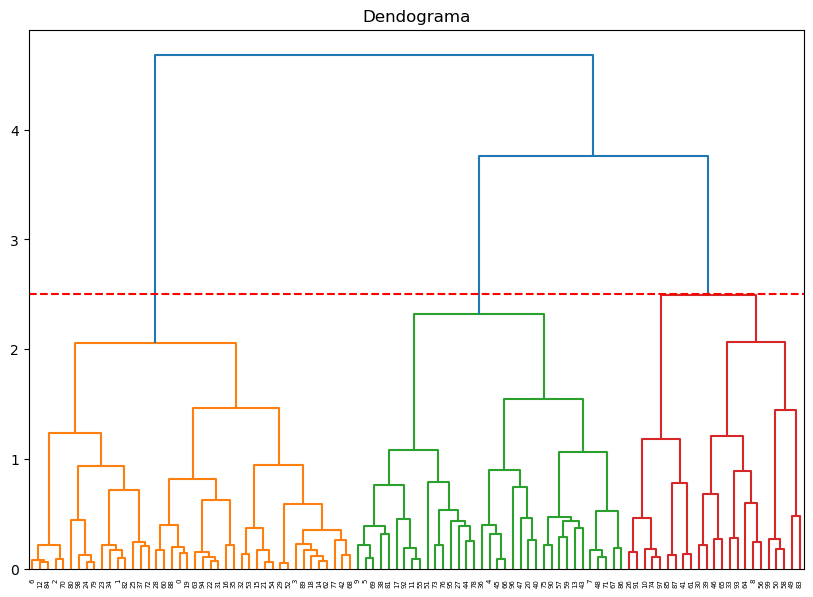

In [21]:
# Graficamos
plt.figure(figsize = (10,7))
plt.title('Dendograma')
dend = shc.dendrogram(shc.linkage(data_scaled, method = 'ward'))
plt.axhline(y = 2.5, color = 'r', linestyle = '--')

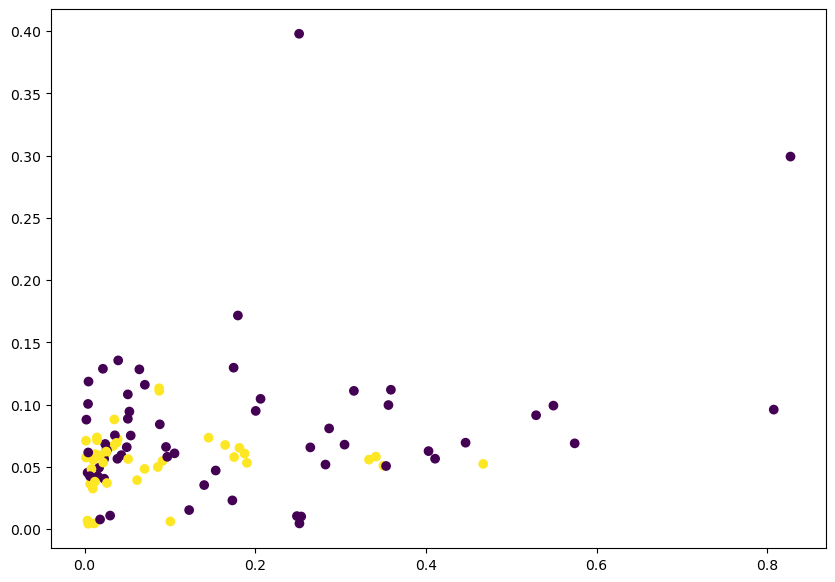

In [29]:
cluster = AgglomerativeClustering(n_clusters = 2, metric = 'euclidean', linkage = 'ward')
grupos = cluster.fit_predict(data_scaled)
plt.figure(figsize = (10, 7))
plt.scatter(data_scaled['Precio'], data_scaled['Numero Estrellas'], c = cluster.labels_)

In [31]:
# Separacion de grupos mediante PCA
campos = data_scaled
from sklearn import decomposition
pca = decomposition.PCA(n_components = 2)
pca.fit(campos)
campos = pca.transform(campos)
campos

array([[-0.39993219,  0.06035374],
       [-0.40829583, -0.06402268],
       [-0.49703182, -0.35955286],
       [-0.33996675,  0.18434501],
       [ 0.58207751, -0.38797653],
       [ 0.1723403 , -0.52962573],
       [-0.56528441, -0.33770585],
       [ 0.5335887 ,  0.06994712],
       [ 0.09981604,  0.47165743],
       [ 0.22195207, -0.56503313],
       [ 0.08274005,  0.39712712],
       [-0.00143465, -0.48936583],
       [-0.57292039, -0.35927774],
       [ 0.51350639,  0.01301312],
       [-0.35272162,  0.20639728],
       [-0.4688626 ,  0.0168001 ],
       [-0.25142488,  0.04599019],
       [-0.05456876, -0.22302796],
       [-0.36123131,  0.20553368],
       [-0.41087067,  0.02173183],
       [ 0.54207892, -0.03308916],
       [-0.5138909 , -0.0900875 ],
       [-0.4284552 , -0.0601418 ],
       [-0.42320562, -0.09945498],
       [-0.42610215,  0.06318626],
       [-0.10615885, -0.20376697],
       [ 0.19058214,  0.3966612 ],
       [-0.096838  , -0.33104612],
       [-0.51505714,

In [33]:
# Hacemos un dataframe con la segmentacion creada
dataframe = pd.DataFrame(grupos, columns = ['grupo'])
dataframe

,grupo
0,1
1,1
2,1
3,1
4,0
...,...
95,0
96,0
97,0
98,1


In [35]:
dataframe_final = pd.concat([data, dataframe], axis = 1, join = 'inner')
dataframe_final

,Comprador,Velocidad Entrega,Precio,Durabilidad,Imagen Producto,Valor Educativo,Servicio Retorno,Tamano Paquete,Calidad Producto,Numero Estrellas,grupo
0,Adam,205,3,345,235,24,23,26,21,17,1
1,Anna,9,15,315,33,25,4,42,215,28,1
2,Bernard,17,26,285,3,43,27,41,26,33,1
3,Edward,135,5,355,295,18,23,39,195,17,1
4,Emilia,3,45,48,39,34,46,225,34,43,0
...,...,...,...,...,...,...,...,...,...,...,...
95,Teofan,3,8,32,25,7,21,42,17,1,0
96,Teofil,305,25,46,24,33,28,355,26,45,0
97,Teofila,1,14,26,25,24,27,42,185,23,0
98,Teon,155,11,335,34,26,29,42,215,27,1


In [37]:
Salome = dataframe_final[dataframe_final['Comprador'] == 'Salome']
Salome

,Comprador,Velocidad Entrega,Precio,Durabilidad,Imagen Producto,Valor Educativo,Servicio Retorno,Tamano Paquete,Calidad Producto,Numero Estrellas,grupo
81,Salome,17,23,275,41,4,44,315,28,32,0


En el caso de Salome, le recomendaria los productos que compra Teofila, ya que en base a sus datos, tienen el mismo comportamiento de compra.

In [41]:
Stephania = dataframe_final[dataframe_final['Comprador'] == 'Stephania']
Stephania

,Comprador,Velocidad Entrega,Precio,Durabilidad,Imagen Producto,Valor Educativo,Servicio Retorno,Tamano Paquete,Calidad Producto,Numero Estrellas,grupo
89,Stephania,215,125,465,315,34,4,37,305,45,1


En el caso de Stephania, le recomendaria los productos que compra Edward, ya que en base a sus datos, tienen el mismo comportamiento de compra.

In [43]:
Lydia = dataframe_final[dataframe_final['Comprador'] == 'Lydia']
Lydia

,Comprador,Velocidad Entrega,Precio,Durabilidad,Imagen Producto,Valor Educativo,Servicio Retorno,Tamano Paquete,Calidad Producto,Numero Estrellas,grupo
54,Lydia,19,4,435,145,16,21,28,185,24,1


En el caso de Lydia, le recomendaria los productos que compra Teon, ya que en base a sus datos, tienen el mismo comportamiento de compra.

# Conclusion
Una vez evaluado el comportamiento de compra de cada una de la scandidatas, pudimos asignarles un grupo en el cual el comportamiento de compra tiene muchas similitudes, con esto podriamos asegurar que estas candidatas tienen alta probabilidad de que compren los prodcutos recomendados.